In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("Puerto de luna.csv")

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").reset_index(drop=True)


In [4]:
# inches → mm
df["ppt_mm"] = df["ppt (inches)"] * 25.4

# Fahrenheit → Celsius
df["tmean_C"] = (df["tmean (degrees F)"] - 32) * 5/9


In [5]:
def thornthwaite(tmean, lat, dates):
    tmean = tmean.clip(lower=0)

    I = (tmean / 5) ** 1.514
    I = I.groupby(dates.dt.year).transform("sum")

    a = (
        6.75e-7 * I**3
        - 7.71e-5 * I**2
        + 1.792e-2 * I
        + 0.49239
    )

    PET = 16 * (10 * tmean / I) ** a

    lat_rad = np.deg2rad(lat)
    month = dates.dt.month

    day_factor = np.array(
        [0.69, 0.72, 0.77, 0.83, 0.89, 0.93,
         0.95, 0.93, 0.89, 0.83, 0.77, 0.72]
    )

    PET = PET * day_factor[month - 1]
    return PET

In [6]:
latitude = 35.03
df["PET"] = thornthwaite(df["tmean_C"], latitude, df["Date"])


In [7]:
df["D"] = df["ppt_mm"] - df["PET"]


In [8]:
df["D_3"] = df["D"].rolling(3).sum()

df["SPEI_3"] = (
    (df["D_3"] - df["D_3"].mean()) /
    df["D_3"].std()
)

In [9]:
#Extracting sumer months only
df["month"] = df["Date"].dt.month
summer = df[df["month"].isin([6, 7, 8])].copy()


In [10]:
summer["year"] = summer["Date"].dt.year

near = summer[(summer["year"] >= 2020) & (summer["year"] < 2070)]
middle = summer[(summer["year"] >= 2070) & (summer["year"] < 2090)]
far = summer[(summer["year"] >= 2090) & (summer["year"] <= 2120)]


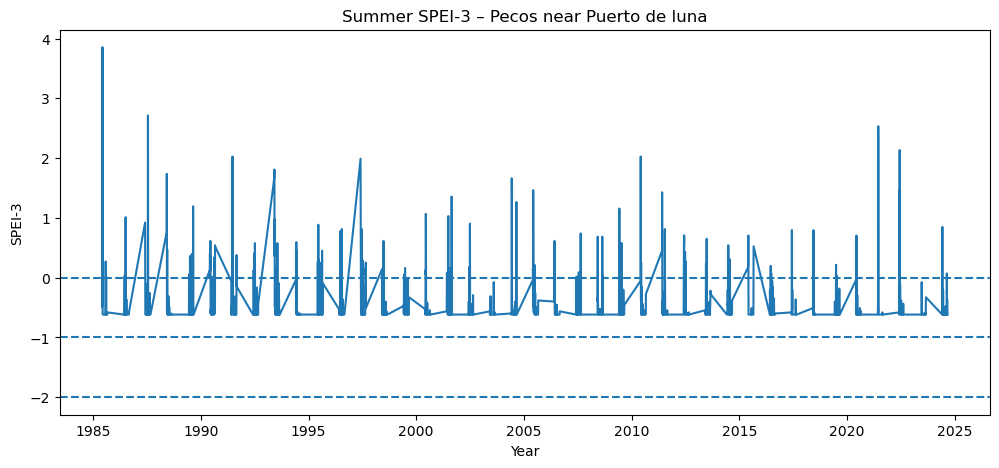

In [22]:
plt.figure(figsize=(12,5))
plt.plot(summer["Date"], summer["SPEI_3"])
plt.axhline(-1, linestyle="--")
plt.axhline(-2, linestyle="--")
plt.axhline(0, linestyle="--")
plt.title("Summer SPEI-3 – Pecos near Puerto de luna")
plt.xlabel("Year")
plt.ylabel("SPEI-3")
plt.show()


In [43]:
import pandas as pd

df = pd.read_csv("Puerto de luna.csv")


In [46]:
df.columns


Index(['ppt (inches)', 'tmean (degrees F)'], dtype='object')

In [48]:
df.columns = df.columns.str.strip()


In [53]:
# 1. Load the CSV
df = pd.read_csv("PPT_Artesia_NM.csv")


print(df.columns)

# 3. Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# 4. Set Date as index
df = df.set_index("Date")

# 5. Create Year and Month columns
df["Year"] = df.index.year
df["Month"] = df.index.month


Index(['Date', 'ppt (inches)', 'tmean (degrees F)'], dtype='object')


In [54]:
print(df.columns.tolist())


['ppt (inches)', 'tmean (degrees F)', 'Year', 'Month']


In [56]:
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [57]:
summer_df = df[df["Month"].isin([6, 7, 8])].copy()


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [60]:
# If Date is still a column, uncomment:
# df["Date"] = pd.to_datetime(df["Date"])
# df = df.set_index("Date")

# Create Year/Month from the index if needed
if "Year" not in df.columns:
    df["Year"] = df.index.year
if "Month" not in df.columns:
    df["Month"] = df.index.month


In [63]:
df["P_mm"] = df["ppt (inches)"] * 25.4
df["T_C"] = (df["tmean (degrees F)"] - 32) * 5/9


In [64]:
#PET
df["PET_mm"] = np.maximum(0, 0.6 * df["T_C"])


In [65]:
#Water Balance
df["D"] = df["P_mm"] - df["PET_mm"]


In [66]:
df["D_3"] = df["D"].rolling(3).sum()

In [68]:
from scipy.stats import zscore

df["SPEI_3"] = np.nan
df.loc[df["D_3"].notna(), "SPEI_3"] = zscore(df.loc[df["D_3"].notna(), "D_3"])


In [69]:
df[["D_3", "SPEI_3"]].head(10)


,D_3,SPEI_3
Date,,
1985-01-01,NaN,NaN
1985-02-01,NaN,NaN
1985-03-01,12.758667,-0.542879
1985-04-01,54.596667,0.270705
1985-05-01,49.327333,0.168237
1985-06-01,95.488000,1.065879
1985-07-01,52.970667,0.239085
1985-08-01,46.302000,0.109406
1985-09-01,88.796000,0.935746


In [70]:
summer_df = df[df["Month"].isin([6,7,8])].copy()
summer_df["SPEI_3"].dropna().head()


Date
1985-06-01    1.065879
1985-07-01    0.239085
1985-08-01    0.109406
1986-06-01    2.387665
1986-07-01    2.892872
Name: SPEI_3, dtype: float64

In [71]:
summer_df = df[df["Month"].isin([6,7,8])].copy()
summer_df["SPEI_3"].dropna().head()


Date
1985-06-01    1.065879
1985-07-01    0.239085
1985-08-01    0.109406
1986-06-01    2.387665
1986-07-01    2.892872
Name: SPEI_3, dtype: float64

In [72]:
import numpy as np
import matplotlib.pyplot as plt

future_years = np.arange(2021, 2121)


In [73]:
np.random.seed(42)

# Gradual drying trend (~ -1 SPEI over 100 years)
trend = np.linspace(0, -1.0, len(future_years))

synthetic_spei = (
    np.random.choice(historical_spei, size=len(future_years), replace=True)
    + trend
)


NameError: name 'historical_spei' is not defined

In [74]:
# Select summer months
summer_df = df[df["Month"].isin([6, 7, 8])].copy()

# Extract historical summer SPEI-3 values
historical_spei = summer_df["SPEI_3"].dropna().values


print(len(historical_spei))


120


In [75]:
import numpy as np
import matplotlib.pyplot as plt

future_years = np.arange(2021, 2121)

np.random.seed(42)

trend = np.linspace(0, -1.0, len(future_years))

synthetic_spei = (
    np.random.choice(historical_spei, size=len(future_years), replace=True)
    + trend
)


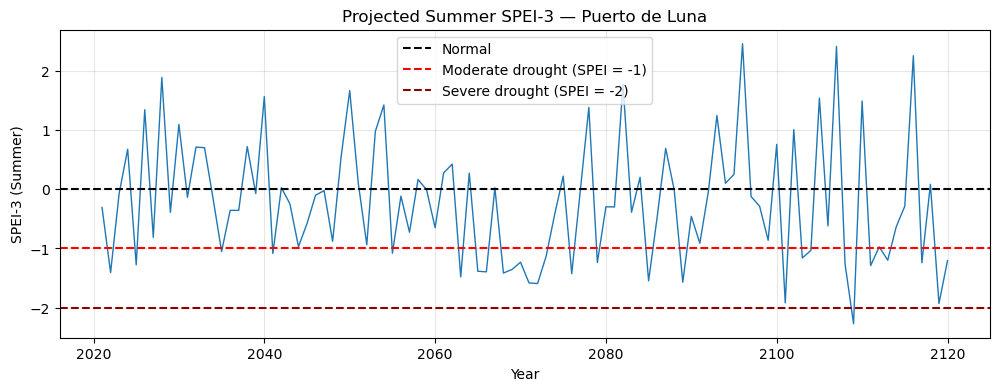

In [77]:
plt.figure(figsize=(12, 4))
plt.plot(future_years, synthetic_spei, linewidth=1)

plt.axhline(0, color="black", linestyle="--", label="Normal")
plt.axhline(-1, color="red", linestyle="--", label="Moderate drought (SPEI = -1)")
plt.axhline(-2, color="darkred", linestyle="--", label="Severe drought (SPEI = -2)")

plt.xlabel("Year")
plt.ylabel("SPEI-3 (Summer)")
plt.title("Projected Summer SPEI-3 — Puerto de Luna")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


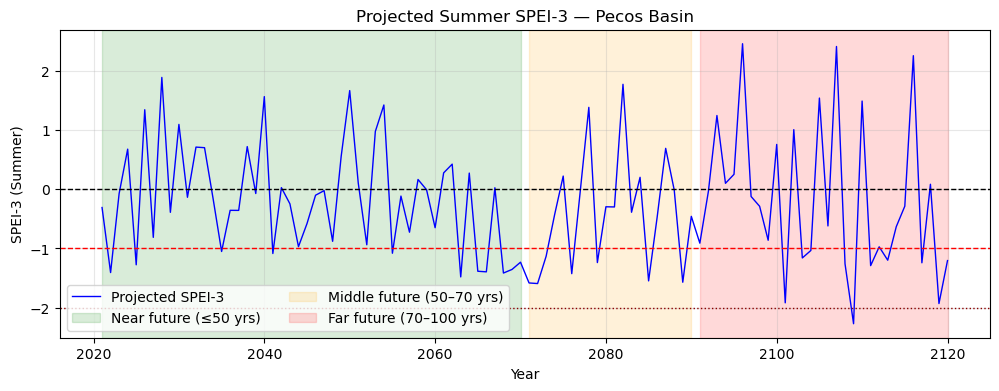

In [81]:
plt.figure(figsize=(12, 4))
plt.plot(future_years, synthetic_spei, color="blue", linewidth=1, label="Projected SPEI-3")

# Drought thresholds
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axhline(-1, color="red", linestyle="--", linewidth=1)
plt.axhline(-2, color="darkred", linestyle=":", linewidth=1)

# Near / Middle / Far future shading
plt.axvspan(2021, 2070, color="green", alpha=0.15, label="Near future (≤50 yrs)")
plt.axvspan(2071, 2090, color="orange", alpha=0.15, label="Middle future (50–70 yrs)")
plt.axvspan(2091, 2120, color="red", alpha=0.15, label="Far future (70–100 yrs)")

plt.xlabel("Year")
plt.ylabel("SPEI-3 (Summer)")
plt.title("Projected Summer SPEI-3 — Pecos Basin")
plt.legend(loc="lower left", ncol=2)
plt.grid(alpha=0.3)

plt.show()
